# Project: Finding the best markets to advertise in 

Introduction:

We are working for an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but we also cover many other domains, like data science, game development... We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the 2 best markets to advertise our product in.

The dataset is from freeCodeCamp's 2017 New Coder Survey. We can find the data here: https://github.com/freeCodeCamp/2017-new-coder-survey
There are some statistic from the survey that we can refer to the link: https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/
    

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
survey=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to reach our goal,  we only focus on some information from the survey:
- Age
- Gender
- HoursLearning
- Income
- Language
- Marital status
- Money for learning
- Months for programming
- Podcast
- Youtube
- Country citizen
- Subject interested in: Full-Stack Web Developer, Front-End Web Developer, Back-End Web developer, Data scientist/Data Engineer, Mobile  Developer

The dataset is available to use that cost nothing and saves time for us, it could be time consuming as well as financial cost to make a survey.

# Checking for Sample representativity

In [2]:
survey["JobRoleInterest"].value_counts(normalize=True)*100
   

Full-Stack Web Developer                                                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                         

From the information in above table, we can see:
- There are many new coders are interested in Full-Stack web development, Front-end web development and back-end development.
- There are few people are interested in mobile developer
- There are few people are interested in other domains than web and mobile development
- There are many people are interested in more than one subject. 

So we will split the data into 2 type: interested in single subject and multi subjects:
- Drop the null data
- Generate a frequency table for the variable describing number of options

In [3]:
survey_no_null=survey["JobRoleInterest"].dropna()
survey_split_option=survey_no_null.str.split(",")
survey_split_option_counts=survey_split_option.apply(lambda x: len(x))
options_counts=survey_split_option_counts.value_counts(normalize=True)*100
print(type(options_counts))
interest_table=options_counts.to_frame().reset_index()
interest_table.columns=["Number of subjects", "Counts"]
interest_table

<class 'pandas.core.series.Series'>


,Number of subjects,Counts
0,1,31.650458
1,3,15.889588
2,4,15.217391
3,5,12.042334
4,2,10.883867
5,6,6.721968
6,7,3.861556
7,8,1.759153
8,9,0.986842
9,10,0.471968


In [4]:
single_subject=interest_table[interest_table["Number of subjects"]==1]["Counts"].sum()
multi_subjects=interest_table[interest_table["Number of subjects"]>1]["Counts"].sum()
single_or_multi_subject=[single_subject, multi_subjects]
single_or_multi_subject

[31.650457665903893, 68.3495423340961]

There are 31.7 % new coders are interested in single subject, and more than 68% others are interested in mixed subjects.

As our e-learning website mainly teaches web and mobile delelopment so we will check the dataset is good source to represent the potential customers that we want to advertise in.

In [5]:
survey_no_null=survey["JobRoleInterest"]
web_or_mobile_table=survey_no_null.str.contains("Web Developer|Mobile Developer").value_counts(normalize=True)*100
web_or_mobile_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

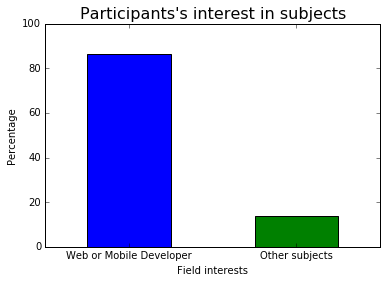

In [6]:
web_or_mobile_table.plot.bar()
plt.xlabel("Field interests")
plt.ylabel("Percentage")
plt.title("Participants's interest in subjects", fontsize=16)
plt.xticks([0,1],["Web or Mobile Developer", "Other subjects"], rotation=0)
plt.ylim([0,100])
plt.show()

Most of participants are interest in multi subjects and more than 85% of them are interest in our main course (Web/mobile developer) so the database is a good sample for our goal

# Find the market: Location and densities

In order to invest money in advertising in the market. We should consider where the potential customer lives by diving into the information of location in column: <b> CountryLive </b>

In [7]:
survey_clean=survey[survey["JobRoleInterest"].notnull()]
country=survey_clean["CountryLive"].dropna() #to drop the rows that the participants didnt answer this question
country.value_counts().head(5) 

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [8]:
country.value_counts(normalize=True)*100 #in percentage


United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

The biggest market is US and India, but rather choose these market right away, we should take into account the money that they are willing to pay too. If they prefer not to pay money to learn, it will not be profitable for our company

# Spending money for learning

The dataset of money that the participants are willing to pay is in column <b>MoneyForLearning</b> and it's in USD. Our company sells subscriptions at a price of $59 per month, so the market that we need to choose is the place where the potential customers are willing to pay more than 59USD per month and the more they pay the better options. 

We also should narrow down the data to only 4 countries: US, India, UK and Canada because of 2 reasons:
- They are the biggest markets that  many potential customers are living
- The language of the course is in English. The potential customer with English is their first language will prefer the course rather than others people in the country does not use English is their mother language

In [9]:
country_list=["United States of America", "India", "United Kingdom", "Canada"]

filtered_survey=survey_clean[survey_clean["CountryLive"].isin(country_list)]
filtered_survey

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In orderto analyse the money that people are willing to pay, we will check how much they paid for the course per month. There are some people did not answer this question and some people said it is 0 month, it probably because that they have just started learning, we should change the data from 0 month to 1 month to calculate the money spent per month that won't get error and alo need to drop null values.

In [10]:
filtered_survey["MonthsProgramming"].value_counts().sort_index()

0.0      150
1.0      480
2.0      401
3.0      380
4.0      209
5.0      156
6.0      397
7.0       72
8.0      132
9.0       70
10.0      83
11.0      25
12.0     386
13.0      22
14.0      49
15.0      45
16.0      36
17.0      16
18.0      92
19.0       5
20.0      53
21.0       5
22.0       2
23.0       1
24.0     267
25.0       7
26.0       8
27.0       4
28.0       9
29.0       4
        ... 
55.0       3
58.0       1
59.0       2
60.0      47
70.0       2
72.0      19
73.0       1
80.0       1
83.0       1
84.0       4
89.0       1
96.0       3
100.0      4
108.0      2
111.0      1
113.0      1
120.0      8
144.0      4
156.0      1
171.0      1
180.0      1
190.0      1
198.0      1
200.0      4
240.0      2
300.0      1
360.0      3
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 80, dtype: int64

In [11]:
filtered_survey["MonthsProgramming"].replace(0,1, inplace=True)


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
country_spending_table=filtered_survey[["CountryLive","MoneyForLearning", "MonthsProgramming", "AttendedBootcamp"]]
country_spending_table=country_spending_table[country_spending_table["MonthsProgramming"].notnull()]
country_spending_table=country_spending_table[country_spending_table["MoneyForLearning"].notnull()]
country_spending_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 1 to 18156
Data columns (total 4 columns):
CountryLive          3915 non-null object
MoneyForLearning     3915 non-null float64
MonthsProgramming    3915 non-null float64
AttendedBootcamp     3898 non-null float64
dtypes: float64(3), object(1)
memory usage: 152.9+ KB


In [13]:
country_spending_table["MoneyPerMonth"]=country_spending_table["MoneyForLearning"]/country_spending_table["MonthsProgramming"]
country_spending_table.groupby(["CountryLive"])["MoneyPerMonth"].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

From above table, we can see that people in US, India and Canada spent much money than UK. The data shows Indian spent much more money than Canadian coder to learn coding, this might be because they attend bootcamp or there are some outliers that impact the average spending that we should remove.

# Dealing with extreme outliers

In order to find if there is any outlier in out dataset, let use boxplot to see:

In [14]:
country_spending_table
country_spending_table["MoneyPerMonth"].max()

80000.0

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


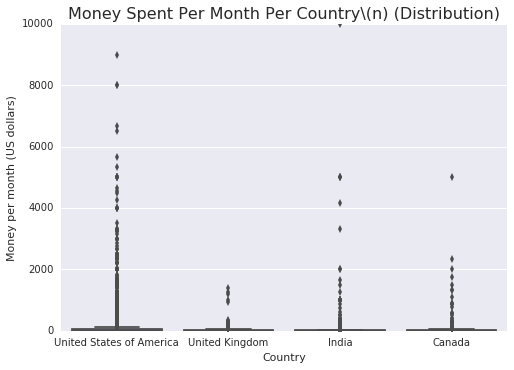

In [15]:
import seaborn as sns
sns.boxplot(y="MoneyPerMonth", x= "CountryLive", data=country_spending_table)
plt.title("Money Spent Per Month Per Country\(n) (Distribution)", fontsize=16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.ylim([0,10000])
plt.show()


From above chart, we can see that people in US spent more money than other country. For US, India, Canada there are some outliers that we should examine too. As the max value of money per month is 80,000USD we should narrow down the value by set the limit of this value is 20,000USD first.

In [16]:
country_spending_table["MoneyPerMonth"].value_counts().sort_index(ascending=False)
country_spending_table=country_spending_table[country_spending_table["MoneyPerMonth"]<20000]
country_spending_table

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
1,United States of America,80.0,6.0,0.0,13.333333
2,United States of America,1000.0,5.0,0.0,200.000000
6,United Kingdom,0.0,12.0,0.0,0.000000
15,United States of America,0.0,1.0,0.0,0.000000
16,United States of America,200.0,12.0,0.0,16.666667
18,United States of America,500.0,14.0,0.0,35.714286
19,United States of America,500.0,28.0,0.0,17.857143
21,United States of America,300.0,3.0,0.0,100.000000
22,United Kingdom,4000.0,14.0,0.0,285.714286
23,United States of America,200.0,2.0,0.0,100.000000


In [17]:
#Re-calculate the mean
country_spending_table.groupby(["CountryLive"], sort=True)["MoneyPerMonth"].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


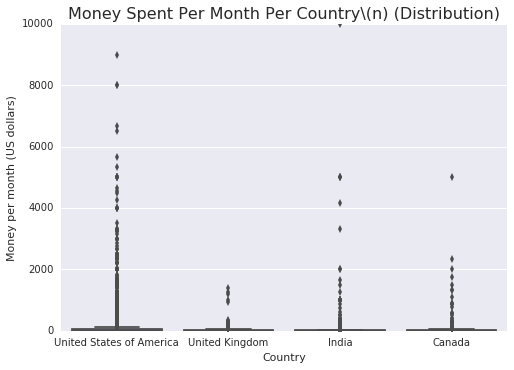

In [18]:
#Re-visualize the distribution of mean
import seaborn as sns
sns.boxplot(y="MoneyPerMonth", x= "CountryLive", data=country_spending_table)
plt.title("Money Spent Per Month Per Country\(n) (Distribution)", fontsize=16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.ylim([0,10000])
plt.show()

In [19]:
country_spending_table


,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
1,United States of America,80.0,6.0,0.0,13.333333
2,United States of America,1000.0,5.0,0.0,200.000000
6,United Kingdom,0.0,12.0,0.0,0.000000
15,United States of America,0.0,1.0,0.0,0.000000
16,United States of America,200.0,12.0,0.0,16.666667
18,United States of America,500.0,14.0,0.0,35.714286
19,United States of America,500.0,28.0,0.0,17.857143
21,United States of America,300.0,3.0,0.0,100.000000
22,United Kingdom,4000.0,14.0,0.0,285.714286
23,United States of America,200.0,2.0,0.0,100.000000


In [20]:
#Examine India's outliers:
india_outlier=country_spending_table[(country_spending_table["CountryLive"]=="India") & 
                           (country_spending_table["MoneyPerMonth"]>=2500)]
india_outlier

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
1728,India,20000.0,4.0,0.0,5000.000000
1755,India,50000.0,15.0,0.0,3333.333333
7989,India,5000.0,1.0,0.0,5000.000000
8126,India,5000.0,1.0,0.0,5000.000000
13398,India,20000.0,2.0,0.0,10000.000000
15587,India,100000.0,24.0,0.0,4166.666667


For people who lives in India and spent for over 2,500USD for learning to code but did not attend any bootcamp so the data seems wrong. It might be because of the people who answer the survey mis-count tuition fee in school as money for coding learning. So we will drop this data.

In [21]:
#Drop India's outliers:
country_spending_table=country_spending_table.drop(india_outlier.index)
country_spending_table

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
1,United States of America,80.0,6.0,0.0,13.333333
2,United States of America,1000.0,5.0,0.0,200.000000
6,United Kingdom,0.0,12.0,0.0,0.000000
15,United States of America,0.0,1.0,0.0,0.000000
16,United States of America,200.0,12.0,0.0,16.666667
18,United States of America,500.0,14.0,0.0,35.714286
19,United States of America,500.0,28.0,0.0,17.857143
21,United States of America,300.0,3.0,0.0,100.000000
22,United Kingdom,4000.0,14.0,0.0,285.714286
23,United States of America,200.0,2.0,0.0,100.000000


There are also people lives in US who spent more than 6,000USD to learning coding per month, that is also too expensive. Let's see if they attend any bootcamp which cost more than 3,000USD/course.

In [22]:
#Check US's outliers:
check_us=country_spending_table[(country_spending_table["CountryLive"]=="United States of America") & 
                           (country_spending_table["MoneyPerMonth"]>=6000)]
check_us

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
718,United States of America,8000.0,1.0,1.0,8000.000000
1222,United States of America,13000.0,2.0,1.0,6500.000000
3184,United States of America,9000.0,1.0,1.0,9000.000000
3930,United States of America,65000.0,6.0,0.0,10833.333333
6805,United States of America,15000.0,1.0,1.0,15000.000000
7198,United States of America,70000.0,5.0,0.0,14000.000000
7505,United States of America,20000.0,3.0,1.0,6666.666667
9778,United States of America,8000.0,1.0,1.0,8000.000000
16650,United States of America,200000.0,12.0,0.0,16666.666667
16997,United States of America,12500.0,1.0,0.0,12500.000000


In the data there are 13 people that spent more than 6000USD/month on learning code. There are 7 people attend bootcamp and 6 people didnt, so we will remove the outlier:
- Didn't attend bootcamp and
- Had been programming for three months or less when at the time they completed the survey. As they might attend a bootcamp and paid a huge initial amount for first months and wouldn't pay anythings for next couple months, the average money per month should be lower. We should drop these data instead
    

In [23]:
#Drop the data of correspondents who didnt attend any bootcamp:
no_boot_camp=country_spending_table[(country_spending_table["CountryLive"]=="United States of America") 
                                   & 
                                   (country_spending_table["MoneyPerMonth"]>=6000)
                                   &
                                   (country_spending_table["AttendedBootcamp"]==0)]
country_spending_table=country_spending_table.drop(no_boot_camp.index)
#Drop the data of correspondents that had been learning code for less than 3 months:
less_than_3_months=country_spending_table[(country_spending_table["CountryLive"]=="United States of America")
                                         & 
                                          (country_spending_table["MoneyPerMonth"]>=6000)
                                         &
                                          (country_spending_table["MonthsProgramming"]<=3)
                                         ]
country_spending_table=country_spending_table.drop(less_than_3_months.index)

For Canada, from the boxplot, we can see some extreme value above 4,500USD so let's check that data too.

In [24]:
#Check outlier of Canada
canada_outlier=country_spending_table[(country_spending_table["CountryLive"]=="Canada") 
                                      & 
                                      (country_spending_table["MoneyPerMonth"]>=4500)]
canada_outlier

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
13659,Canada,10000.0,2.0,1.0,5000.0


Eventhough the person who responsed to the survey spent 5000USD per month for coding and attended bootcamp but just learning for 2 months. As analyzing in US, we should drop this data as well.

In [25]:
#Remove Canda outlier:
country_spending_table=country_spending_table.drop(canada_outlier.index)
country_spending_table

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,MoneyPerMonth
1,United States of America,80.0,6.0,0.0,13.333333
2,United States of America,1000.0,5.0,0.0,200.000000
6,United Kingdom,0.0,12.0,0.0,0.000000
15,United States of America,0.0,1.0,0.0,0.000000
16,United States of America,200.0,12.0,0.0,16.666667
18,United States of America,500.0,14.0,0.0,35.714286
19,United States of America,500.0,28.0,0.0,17.857143
21,United States of America,300.0,3.0,0.0,100.000000
22,United Kingdom,4000.0,14.0,0.0,285.714286
23,United States of America,200.0,2.0,0.0,100.000000


In [26]:
country_spending_table.groupby(["CountryLive"], sort=True)["MoneyPerMonth"].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


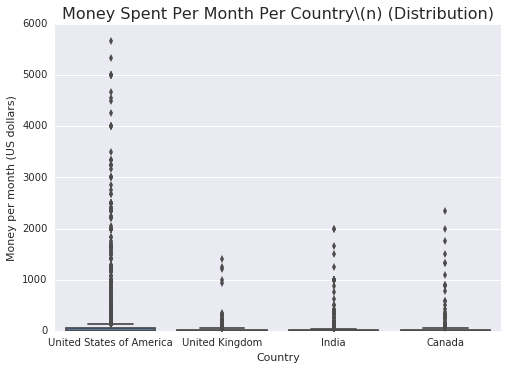

In [27]:
#Visualize the distribution again
import seaborn as sns
sns.boxplot(y="MoneyPerMonth", x= "CountryLive", data=country_spending_table)
plt.title("Money Spent Per Month Per Country\(n) (Distribution)", fontsize=16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.ylim([0,6000])
plt.show()

# Choosing the two best markets

From above analying, the best market to choose is US as there are many potential customer and they are also willing to pay more to learn.

For the 2nd best market, it could be India or Canada. Let's compare data of them:

In [28]:
countries_live=country_spending_table["CountryLive"].value_counts(normalize=True)*100
countries_live

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

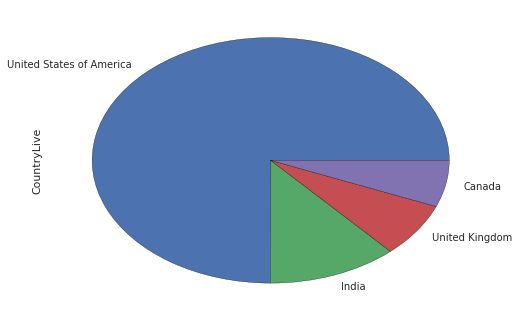

In [29]:
countries_live.plot.pie()
plt.show()

In [30]:
money_per_month=country_spending_table.groupby(["CountryLive"], sort=True)["MoneyPerMonth"].mean()
money_per_month

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

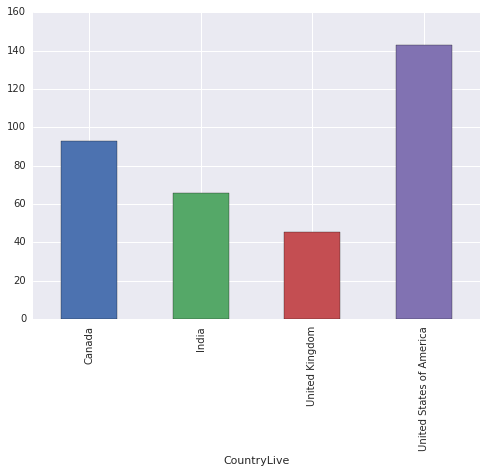

In [31]:
money_per_month.plot.bar()

While India has more people learn coding but they are not willing to pay much money as Canadian do. Indian customer had paid 65USD compares to Canadian is 93USD while our course's price is 59USD. It's not clear to choose the 2nd best markets. It should be taken consider from the relevant team then.